In [16]:
import numpy as np
from sklearn.datasets import make_blobs # classification function cluster data
import matplotlib.pyplot as plt
import matplotlib.colors
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [17]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

In [18]:
data , labels = make_blobs(n_samples=1000,centers=2,n_features=2,random_state=0)# centers=2 - 2 classification , n_features=2 - class feature , size etc.,
print(data.shape,labels.shape)

(1000, 2) (1000,)


C:\Users\admin\AppData\Local\Temp\ipykernel_13560\2938434019.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


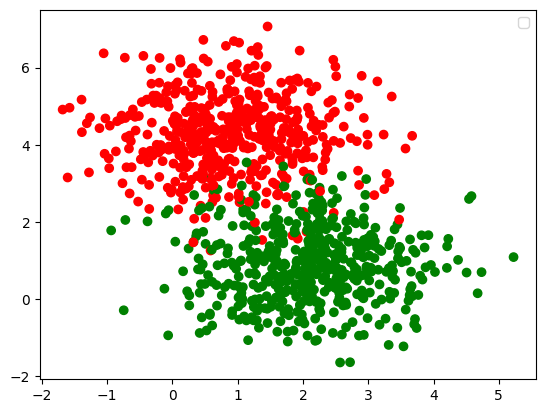

In [19]:
plt.scatter(data[:,0],data[:,1],c = labels,cmap = my_cmap ) # x - 0 , y - 1


# Add a legend
plt.legend()

file_path = r"T:\My Drive\000 ihsan\02 Courses\003GIT\MYProject\classification_logisticregression\plots\Classplot.jpg"
plt.savefig(file_path, format='jpg', dpi=300)


plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_13560\3200999474.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


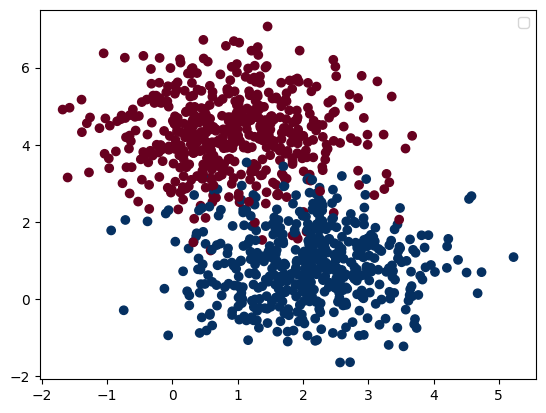

In [20]:
plt.scatter(data[:,0],data[:,1],c = labels,cmap = "RdBu" ) # x - 0 , y - 1


# Add a legend
plt.legend()

file_path = r"T:\My Drive\000 ihsan\02 Courses\003GIT\MYProject\classification_logisticregression\plots\ClassplotRdBu.jpg"
plt.savefig(file_path, format='jpg', dpi=300)



plt.show()

In [21]:
x_train,x_test,y_train,y_test = train_test_split(data,labels,stratify=labels,random_state=0) # classification no split 20% - spit
print(x_train.shape,x_test.shape)

(750, 2) (250, 2)


In [22]:
model = linear_model.LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [23]:
y_predict = model.predict(x_test)


In [24]:
y_predict

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1])

In [25]:
accuracy_score(y_test,y_predict) # 1st test 2nd predict

0.944

In [26]:
coeff = model.coef_ #theeta 1
intercept = model.intercept_ # teeta 0

In [27]:
print(coeff,intercept)

[[ 0.87887386 -2.92547221]] [6.28458123]


In [28]:
x1min,x1max = x_test[:,0].min()-0.5,x_test[:,0].max()+0.5 # feature one min and max
x2min , x2max = x_test[:,1].min()-0.5,x_test[:,1].max()+0.5 # feature two min and max

xvals = np.arange(x1min,x1max,0.2)
yvals = np.arange(x2min,x2max,0.2)# min , max b\w .2 value arange

xx,yy = np.meshgrid(xvals,yvals)# create mix , one x value- allay value , nd x value all y value

grid = np.c_[xx.ravel(),yy.ravel()]

probs = model.predict_proba(grid)[:,1].reshape(xx.shape) # reshape to xx shape

C:\Users\admin\AppData\Local\Temp\ipykernel_13560\638199328.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


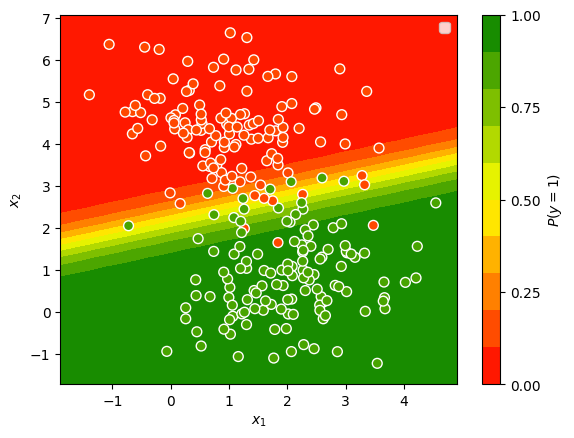

In [29]:
f , ax = plt.subplots()
contour = ax.contourf(xx,yy,probs,10,cmap = my_cmap,vmin = 0,vmax = 1)#probs x y change , 10 - level change ,colormap ,

ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0,0.25,0.5,.75,1])

ax.scatter(x_test[:,0],x_test[:,1],c = y_test,s = 50,cmap = my_cmap,vmin = -0.2 , vmax = 1.2 , edgecolor = "white",linewidths=1)
ax.set_ylabel("$x_2$")
ax.set_xlabel("$x_1$")

# Add a legend
plt.legend()

file_path = r"T:\My Drive\000 ihsan\02 Courses\003GIT\MYProject\classification_logisticregression\plots\Classplotfinal.jpg"
plt.savefig(file_path, format='jpg', dpi=300)

plt.show()
